In [61]:
import pandas as pd
import numpy as np
import copy as cp

import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from heatmap import heatmap, corrplot

In [2]:
onedrive_path = "C:/Users/cfowle/The Estée Lauder Companies Inc/TeamAnis - General/"

In [3]:
just_rr = pd.read_csv(onedrive_path + "Data/Combined/relative_rr_data_w_target_encodings.csv")
rr_cc   = pd.read_csv(onedrive_path + "Data/Combined/relative_rr_cc_data_w_target_encodings.csv")

### Filter to 2017 + data

In [4]:
just_rr = just_rr.loc[just_rr["year"] >= 2017 ].drop("Unnamed: 0", axis = 1).sort_values(["month", "year"])
rr_cc = rr_cc.loc[rr_cc["year"] >= 2017 ].drop("Unnamed: 0", axis = 1).sort_values(["month", "year"])

## Models

### R&R Data + Demand Data

In [5]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8907438031571706

In [10]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     4896.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:33:26   Log-Likelihood:            -1.7134e+05
No. Observations:               13650   AIC:                         3.427e+05
Df Residuals:                   13633   BIC:                         3.428e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.394e+05   1

### Just R&R Data

In [13]:
X= X[['month', 'year', 'percent_1', 'percent_2', 'percent_3', 'percent_4',
       'percent_5', 'percent_negative', 'percent_neutral', 'percent_positive']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

-37.44190250843596

In [16]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     43.48
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.36e-77
Time:                        16:35:27   Log-Likelihood:            -1.8417e+05
No. Observations:               13650   AIC:                         3.684e+05
Df Residuals:                   13640   BIC:                         3.684e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.185e+06   3.09e+06  

### R&R + Demand + PCA

In [66]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [67]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

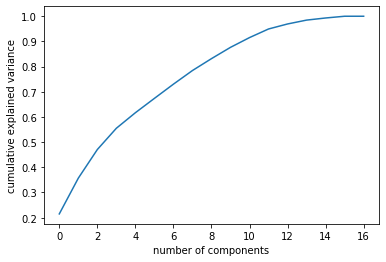

In [68]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [69]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [71]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.9074509422248513

In [72]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     5654.
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:22:36   Log-Likelihood:            -1.7217e+05
No. Observations:               13650   AIC:                         3.444e+05
Df Residuals:                   13637   BIC:                         3.445e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.479e+04    674.824     51.561      0.0

In [73]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(just_rr.drop(["demand_F1"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.6538292468871956%
                   0                    1
0             demand  0.44086427124861194
1          demand_P1  0.43315414527186186
2          demand_P2   0.4272359220325829
3   avg_brand_demand  0.29611484497907636
4  avg_subcat_demand  0.29594465477889853
Feature 1 , Explains 2.414633118967149%
                     0                    1
0               demand   0.2574143238216109
1            demand_P1  0.25370153856083427
2            demand_P2  0.24492735310405425
3                month   0.1898073922919812
4  avg_12_month_demand  0.14818430611347191
Feature 2 , Explains 1.932772671527949%
                   0                     1
0               year   0.23170134258976413
1          demand_P2   0.12055497736504585
2          demand_P1   0.11410152399436879
3             demand   0.10881014418518033
4  avg_subcat_demand  0.008759332696176477
Feature 3 , Explains 1.4368425958718887%
                  0                    1
0         percent_1   0

In [76]:
principalDf["y"] = y
principalDf.corr()["y"]

0    -0.026697
1     0.011737
2    -0.024909
3     0.011440
4     0.008188
5    -0.010337
6    -0.018886
7     0.009749
8     0.006674
9    -0.031069
10   -0.004060
11    0.003997
y     1.000000
Name: y, dtype: float64

### Demand + PCA

In [44]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [46]:
X = X[['demand', 'demand_P2', 'demand_P1', 'avg_subcat_demand',
       'monthly_avg_demand', 'avg_12_month_demand', 'avg_brand_demand',
       'month', 'year']]

In [47]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

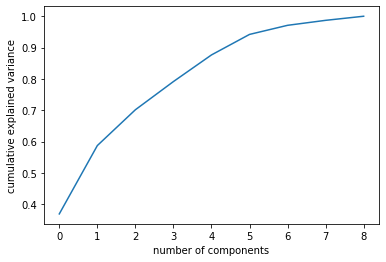

In [48]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [49]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.9074163937712858

In [52]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.131e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:53:22   Log-Likelihood:            -1.7217e+05
No. Observations:               13650   AIC:                         3.443e+05
Df Residuals:                   13643   BIC:                         3.444e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.483e+04    674.614     51.635      0.0

In [53]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(just_rr.drop(["demand_F1"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.3207425085215774%
                   0                    1
0             demand   0.5167644125187411
1          demand_P1   0.5081503673165344
2          demand_P2   0.4996164237303924
3  avg_subcat_demand  0.33515523663854524
4   avg_brand_demand  0.32124940999788953
Feature 1 , Explains 1.9638610346328824%
                   0                     1
0               year   0.25774604799131345
1          demand_P2   0.07367656985170036
2          demand_P1    0.0654166327927874
3             demand    0.0600264236933624
4  avg_subcat_demand  -0.01251646904186815
Feature 2 , Explains 1.0290722779295418%
                     0                    1
0                 year    0.782689291648718
1  avg_12_month_demand   0.4398237390619517
2                month  0.18683540003029522
3            demand_P1  0.04582479156529957
4            demand_P2  0.04133307091382982
Feature 3 , Explains 0.810315293852019%
                     0                     1
0    avg_subcat_de

### R&R + CC + Demand + PCA 

In [54]:
X = cp.deepcopy(rr_cc)
y = X.pop("demand_F1")

In [55]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

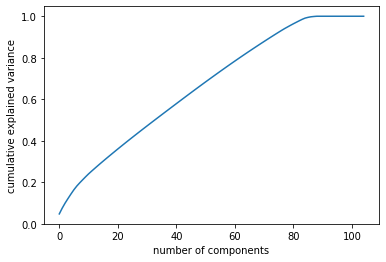

In [56]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

-0.00012502891316401588

In [60]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     931.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:18:20   Log-Likelihood:            -1.7160e+05
No. Observations:               13650   AIC:                         3.434e+05
Df Residuals:                   13569   BIC:                         3.440e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.721e+04   2313.242     29.055      0.0